In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])

In [3]:
y = np.dot(X, np.array([1, 2])) + 3
y

array([ 6,  8,  9, 11])

In [4]:
reg = LinearRegression()
reg

LinearRegression()

In [5]:
reg.fit(X, y)

LinearRegression()

In [6]:
reg.coef_

array([1., 2.])

In [7]:
reg.intercept_, reg.coef_

3.000000000000001

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


pd00 = pd.read_csv('house_big.csv')
pd00.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
pd00.shape

(20640, 10)

<AxesSubplot:ylabel='Frequency'>

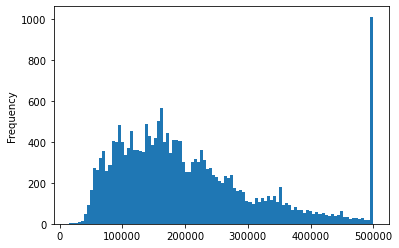

In [3]:
pd00['median_house_value'].plot(kind='hist', bins=100)

In [4]:
pd00['median_house_value'].describe([0.74, 0.9, 0.92, 0.95, 0.99])

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
50%      179700.000000
74%      260300.000000
90%      376600.000000
92%      410288.000000
95%      489810.000000
99%      500001.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [5]:
pd01 = pd00[pd00['median_house_value']<410288]
pd01.shape

(18988, 10)

In [6]:
pd01.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        191
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
pd01['total_bedrooms'] = pd01['total_bedrooms'].fillna(pd01["total_bedrooms"].median())

<ipython-input-7-a9bb69cc338a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd01['total_bedrooms'] = pd01['total_bedrooms'].fillna(pd01["total_bedrooms"].median())


In [8]:
pd01.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
feats = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
label = ['median_house_value']

In [10]:
from sklearn.model_selection import train_test_split

pd_train, pd_test = train_test_split(pd01, test_size=0.2, random_state=0)
pd01.shape, pd_train.shape, pd_test.shape

((18988, 10), (15190, 10), (3798, 10))

In [15]:
from sklearn.metrics import mean_squared_error

def evaluate_linear_regression(feats, label, pd_train, pd_test):
    reg = LinearRegression()
    reg.fit(pd_train[feats], pd_train[label])
    y_pred = reg.predict(pd_test[feats])
    y_true = pd_test[label].values
    return mean_absolute_error(y_true, y_pred)

In [16]:
evaluate_linear_regression(feats, label, pd_train, pd_test)

46853.50147015495

In [17]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

def evaluate_knn_regression(feats, label, pd_train, pd_test):
    knn = KNeighborsRegressor()
    knn.fit(pd_train[feats], pd_train[label])
    y_pred = knn.predict(pd_test[feats])
    y_true = pd_test[label].values
    return mean_absolute_error(y_true, y_pred)

In [18]:
evaluate_knn_regression(feats, label, pd_train, pd_test)

65700.66956292785

In [ ]:
# tune

In [22]:
from sklearn.model_selection import cross_val_score

validation_error = []
k_list = range(1, 50, 2)
for k in k_list:
    model = KNeighborsRegressor(n_neighbors=k)
    validation_error.append(np.mean(cross_val_score(model, pd_train[feats], pd_train[label], cv=5,
                                                   scoring='neg_mean_absolute_error')))
    
validation_error

[-80428.99302172482,
 -67485.3304366908,
 -65062.74534562211,
 -63901.250954575386,
 -63467.2490161656,
 -63259.74812376563,
 -63167.44272547729,
 -63221.6213166557,
 -63144.942953955775,
 -63201.57382280587,
 -63249.641126681076,
 -63213.52355955004,
 -63219.094743910464,
 -63225.440787067506,
 -63219.536071825845,
 -63237.293499543426,
 -63238.104089612374,
 -63231.627649769594,
 -63289.73603188442,
 -63290.3832548404,
 -63312.68893848649,
 -63330.646915810576,
 -63378.072339989754,
 -63423.36916644489,
 -63446.98721097392]

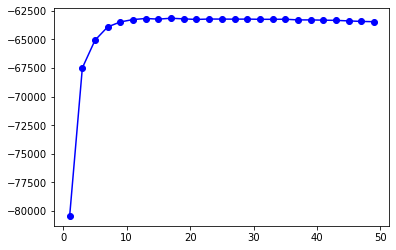

In [24]:
import matplotlib.pyplot as plt

plt.plot(k_list, validation_error,'b-o',label='Choose k')

In [25]:
def evaluate_tune_knn_regression(feats, label, pd_train, pd_test):
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(pd_train[feats], pd_train[label])
    y_pred = knn.predict(pd_test[feats])
    y_true = pd_test[label].values
    return mean_absolute_error(y_true, y_pred)


In [26]:
evaluate_tune_knn_regression(feats, label, pd_train, pd_test)

63635.57214323328

In [ ]:
### Model2

In [86]:
from sklearn.linear_model import Ridge

reg2 = Ridge(alpha=100) # LinearRegresion
reg2.fit(pd_train[feats], pd_train[label])

Ridge(alpha=100)

In [87]:
y_pred2 = reg2.predict(pd_test[feats])

In [88]:
mean_absolute_error(y_true, y_pred2)

46961.91162412965

In [89]:
y_pred2

array([[115003.87143662],
       [122971.47045854],
       [111726.85400571],
       ...,
       [147274.94167685],
       [207640.51345203],
       [163780.56666939]])

In [90]:
y_true

array([[ 68300.],
       [142300.],
       [101800.],
       ...,
       [ 81900.],
       [235100.],
       [156300.]])

In [94]:
np.square(y_true - y_pred2)

array([[2.18125161e+09],
       [3.73592054e+08],
       [9.85424305e+07],
       ...,
       [4.27388300e+09],
       [7.54023401e+08],
       [5.59588777e+07]])

In [96]:
RSS = np.square(y_true - y_pred2).sum() # Residual Sum of Squared 
RSS

14413193143531.482

In [98]:
MSE = RSS/ len(y_true) # Mean Square Error
MSE

3794942902.4569464

In [101]:
np.sqrt(9)

3.0

In [102]:
RMSE = np.sqrt(MSE)
RMSE

61603.10789608708